In [1]:
import pandas as pd
import numpy as np
import sys
import os
sys.path.append(os.path.abspath('../modules'))
from statistical_methods import StatisticalMethods
from best_models import models_to_cv
import matplotlib.colors as mcolors
import seaborn as sns
import math
import matplotlib.pyplot as plt
from results_visualization import plot_metric_boxplots, plot_time_vs_performance_scatter

# Sem ADASYN

In [2]:
best_models, ensembles = models_to_cv()

metrics = {}
for model in best_models.keys():
    metrics[model] = pd.read_csv(f'../metrics/metrics_{model}_cv.csv')

for model in ensembles.keys():
    metrics[model] = pd.read_csv(f'../metrics/metrics_{model}_cv.csv')

In [3]:
list_of_model_results = [metrics[model] for model in metrics.keys()]
list_of_model_names = list(metrics.keys())
list_of_metrics_names = ['train_accuracy', 'test_accuracy', 'ACSA', 'recall', 'precision', 'f1_score', 'training_time', 'inference_time']

comp = StatisticalMethods(list_of_model_results, list_of_model_names, list_of_metrics_names)

friedman_results, metrics_with_difference = comp.friedman_test()

nemenyi_results = comp.nemenyi_test(metrics_with_difference)

In [4]:
comp.get_estimate_and_ci()

,model,metric,mean,std,ci
0,KNN,train_accuracy,0.869090,0.001221,"0.8683, 0.8698"
1,KNN,test_accuracy,0.845615,0.008389,"0.8404, 0.8508"
2,KNN,ACSA,0.800091,0.011624,"0.7929, 0.8073"
3,KNN,recall,0.947569,0.005165,"0.9444, 0.9508"
4,KNN,precision,0.837859,0.009068,"0.8322, 0.8435"
...,...,...,...,...,...
75,ANNs,recall,0.946991,0.007260,"0.9425, 0.9515"
76,ANNs,precision,0.875920,0.010552,"0.8694, 0.8825"
77,ANNs,f1_score,0.910021,0.006441,"0.9060, 0.9140"
78,ANNs,training_time,68.697172,43.765954,"41.5708, 95.8236"


In [5]:
estimates_and_cis = comp.get_formatted_estimate_and_ci()
estimates_and_cis

,Modelo,Métrica,Média,Desvio,IC
0,KNN,Acurácia de treino,86.91,0.12,"[86.83 , 86.98]"
1,KNN,Acurácia de teste,84.56,0.84,"[84.04 , 85.08]"
2,KNN,ACSA,80.01,1.16,"[79.29 , 80.73]"
3,KNN,Recall,94.76,0.52,"[94.44 , 95.08]"
4,KNN,precision,83.79,0.91,"[83.22 , 84.35]"
...,...,...,...,...,...
75,ANNs,Recall,94.70,0.73,"[94.25 , 95.15]"
76,ANNs,precision,87.59,1.06,"[86.94 , 88.25]"
77,ANNs,F1-score,91.00,0.64,"[90.60 , 91.40]"
78,ANNs,Tempo de treinamento,68.70,43.80,"[4157.08 , 9582.36]"


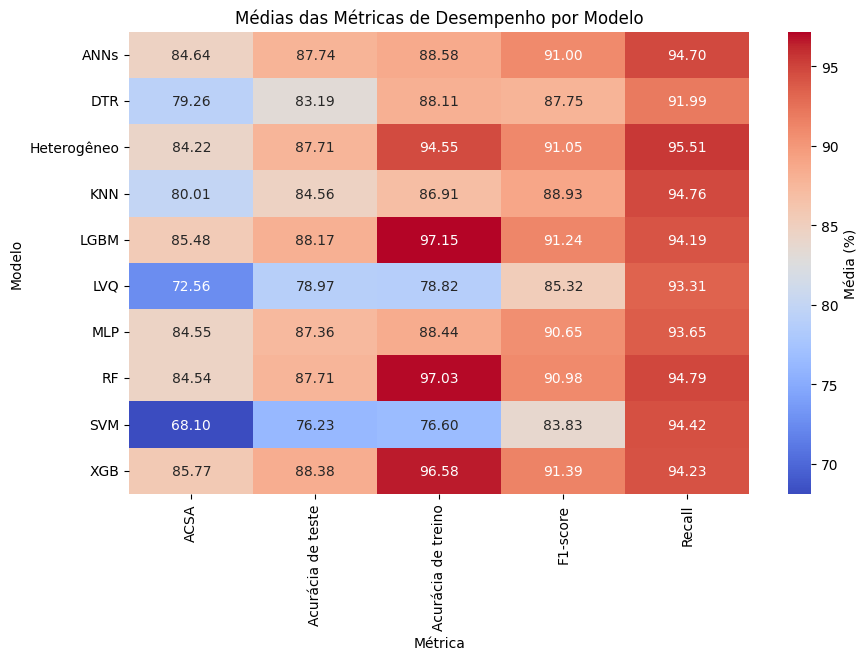

In [6]:
filtered_data = estimates_and_cis[estimates_and_cis['Métrica'].isin(['ACSA', 'Recall', 'F1-score', 'Acurácia de treino', 'Acurácia de teste'])]
heatmap_data = filtered_data.pivot(index="Modelo", columns="Métrica", values="Média")

plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, fmt=".2f", cmap="coolwarm", cbar_kws={'label': 'Média (%)'})
plt.title("Médias das Métricas de Desempenho por Modelo")
plt.xlabel("Métrica")
plt.ylabel("Modelo")
plt.show()

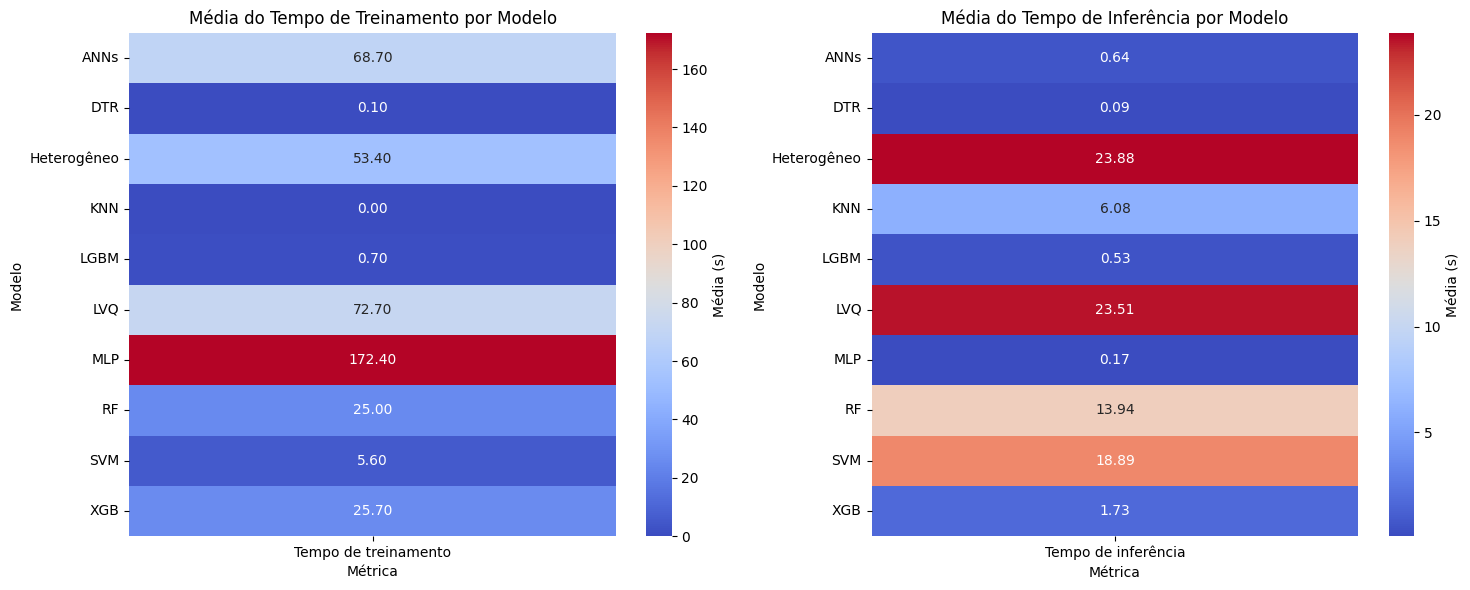

In [7]:
filtered_training_time = estimates_and_cis[estimates_and_cis['Métrica'] == 'Tempo de treinamento']
heatmap_training_time = filtered_training_time.pivot(index="Modelo", columns="Métrica", values="Média")

filtered_inference_time = estimates_and_cis[estimates_and_cis['Métrica'] == 'Tempo de inferência']
heatmap_inference_time = filtered_inference_time.pivot(index="Modelo", columns="Métrica", values="Média")

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

sns.heatmap(heatmap_training_time, annot=True, fmt=".2f", cmap="coolwarm", cbar_kws={'label': 'Média (s)'}, ax=axes[0])
axes[0].set_title("Média do Tempo de Treinamento por Modelo")
axes[0].set_xlabel("Métrica")
axes[0].set_ylabel("Modelo")

sns.heatmap(heatmap_inference_time, annot=True, fmt=".2f", cmap="coolwarm", cbar_kws={'label': 'Média (s)'}, ax=axes[1])
axes[1].set_title("Média do Tempo de Inferência por Modelo")
axes[1].set_xlabel("Métrica")
axes[1].set_ylabel("Modelo")

plt.tight_layout()
plt.show()

In [8]:
friedman_results

,metric,statistic,p-value,are_different
0,train_accuracy,87.112796,6.169010e-15,True
1,test_accuracy,80.753650,1.144746e-13,True
2,ACSA,83.541818,3.188321e-14,True
3,recall,36.942753,2.694459e-05,True
4,precision,83.258182,3.631714e-14,True
5,f1_score,79.309091,2.216481e-13,True
6,training_time,82.690909,4.711513e-14,True
7,inference_time,83.334957,3.505954e-14,True


In [9]:
nemenyi_results

,metric,classifier_pair,p-value,are_different
0,train_accuracy,KNN vs LVQ,0.994324,False
1,train_accuracy,KNN vs DTR,0.996898,False
2,train_accuracy,KNN vs SVM,0.871346,False
3,train_accuracy,KNN vs RF,0.000398,True
4,train_accuracy,KNN vs XGB,0.014370,True
...,...,...,...,...
355,inference_time,LGBM vs Heterogêneo,0.000201,True
356,inference_time,LGBM vs ANNs,1.000000,False
357,inference_time,MLP vs Heterogêneo,0.000003,True
358,inference_time,MLP vs ANNs,0.994324,False


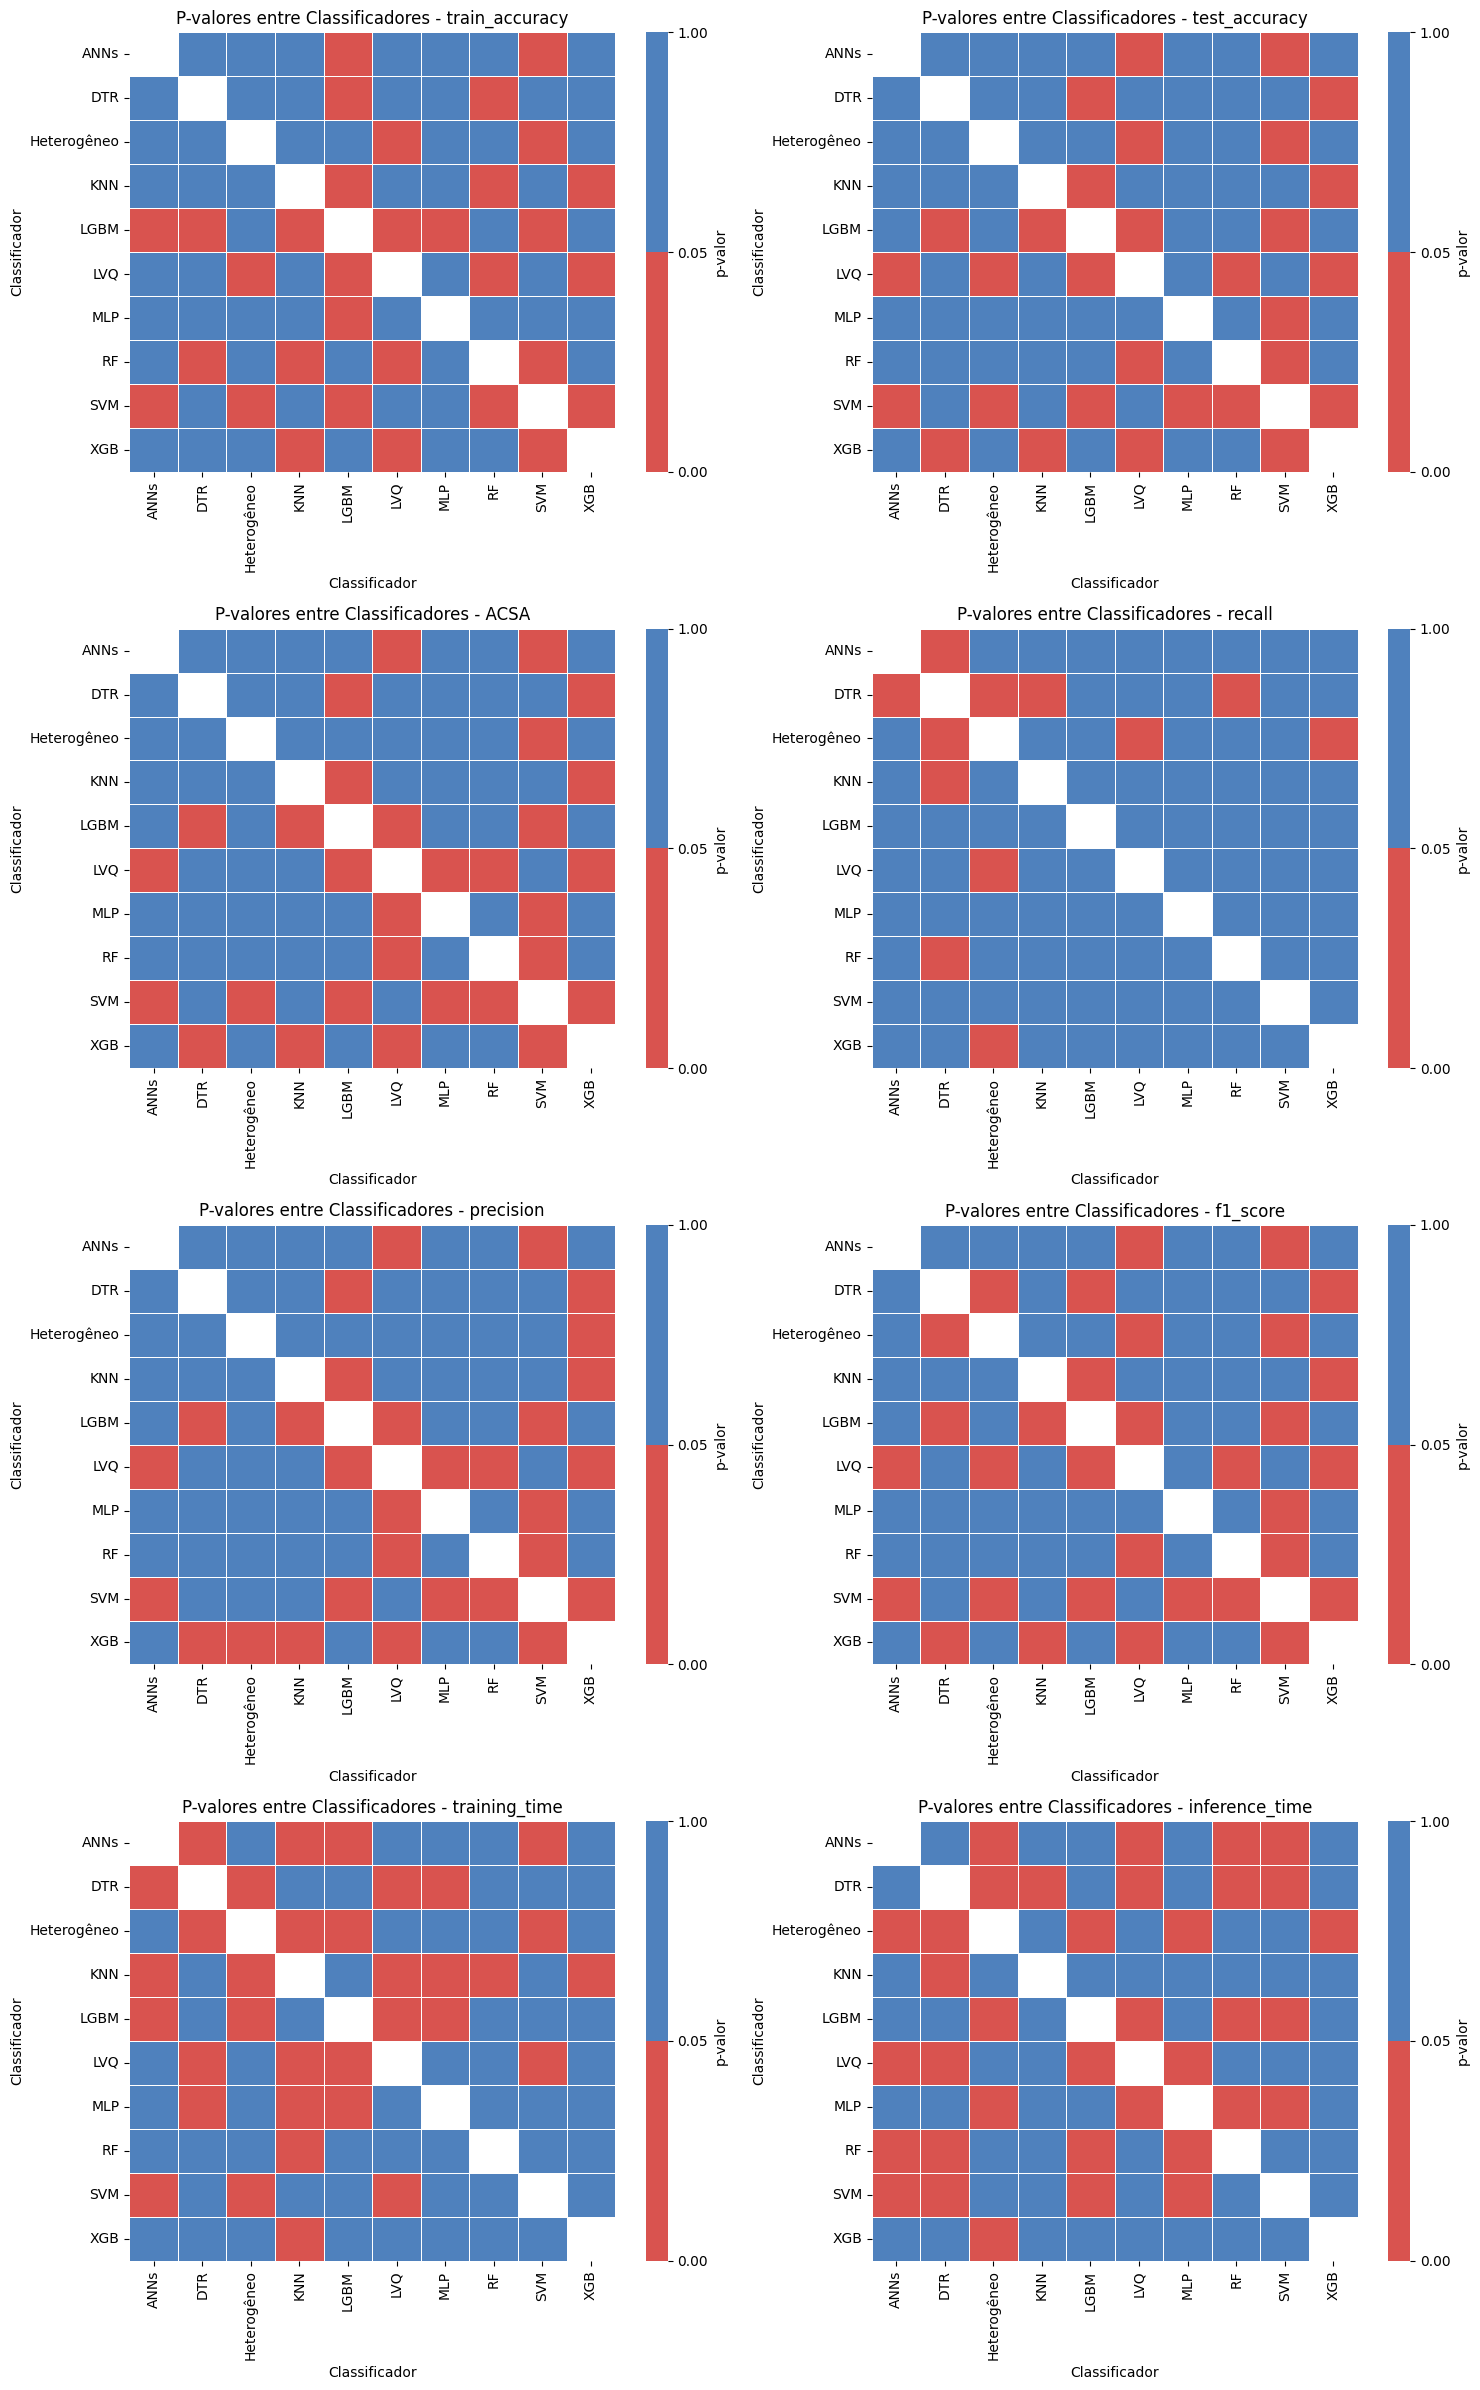

In [10]:

nemenyi_results[['classifier1', 'classifier2']] = nemenyi_results['classifier_pair'].str.split(' vs ', expand=True)

num_metrics = len(nemenyi_results['metric'].unique())
num_columns = 2
num_rows = math.ceil(num_metrics / num_columns)

fig, axes = plt.subplots(num_rows, num_columns, figsize=(15, 6 * num_rows))
axes = axes.flatten()

for i, metric in enumerate(nemenyi_results['metric'].unique()):
    metric_data = nemenyi_results[nemenyi_results['metric'] == metric]
    pivot_table = metric_data.pivot_table(index="classifier1", columns="classifier2", values="p-value").combine_first(metric_data.pivot_table(index="classifier2", columns="classifier1", values="p-value"))
    sns.heatmap(pivot_table, annot=False, fmt=".4f", cmap=mcolors.ListedColormap(["#D9534F", "#4F81BD"]), norm=mcolors.BoundaryNorm([0, 0.05, 1], 2), linewidths=0.5, cbar_kws={'label': 'p-valor'}, annot_kws={'color': 'white', 'fontsize': 10}, ax=axes[i])
    axes[i].set_title(f"P-valores entre Classificadores - {metric}")
    axes[i].set_xlabel("Classificador")
    axes[i].set_ylabel("Classificador")

for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()


In [11]:
nemenyi_results.loc[nemenyi_results['are_different'] == True]

,metric,classifier_pair,p-value,are_different,classifier1,classifier2
3,train_accuracy,KNN vs RF,0.000398,True,KNN,RF
4,train_accuracy,KNN vs XGB,0.014370,True,KNN,XGB
5,train_accuracy,KNN vs LGBM,0.000048,True,KNN,LGBM
11,train_accuracy,LVQ vs RF,0.000003,True,LVQ,RF
12,train_accuracy,LVQ vs XGB,0.000284,True,LVQ,XGB
...,...,...,...,...,...,...
349,inference_time,RF vs ANNs,0.038394,True,RF,ANNs
352,inference_time,XGB vs Heterogêneo,0.048208,True,XGB,Heterogêneo
355,inference_time,LGBM vs Heterogêneo,0.000201,True,LGBM,Heterogêneo
357,inference_time,MLP vs Heterogêneo,0.000003,True,MLP,Heterogêneo


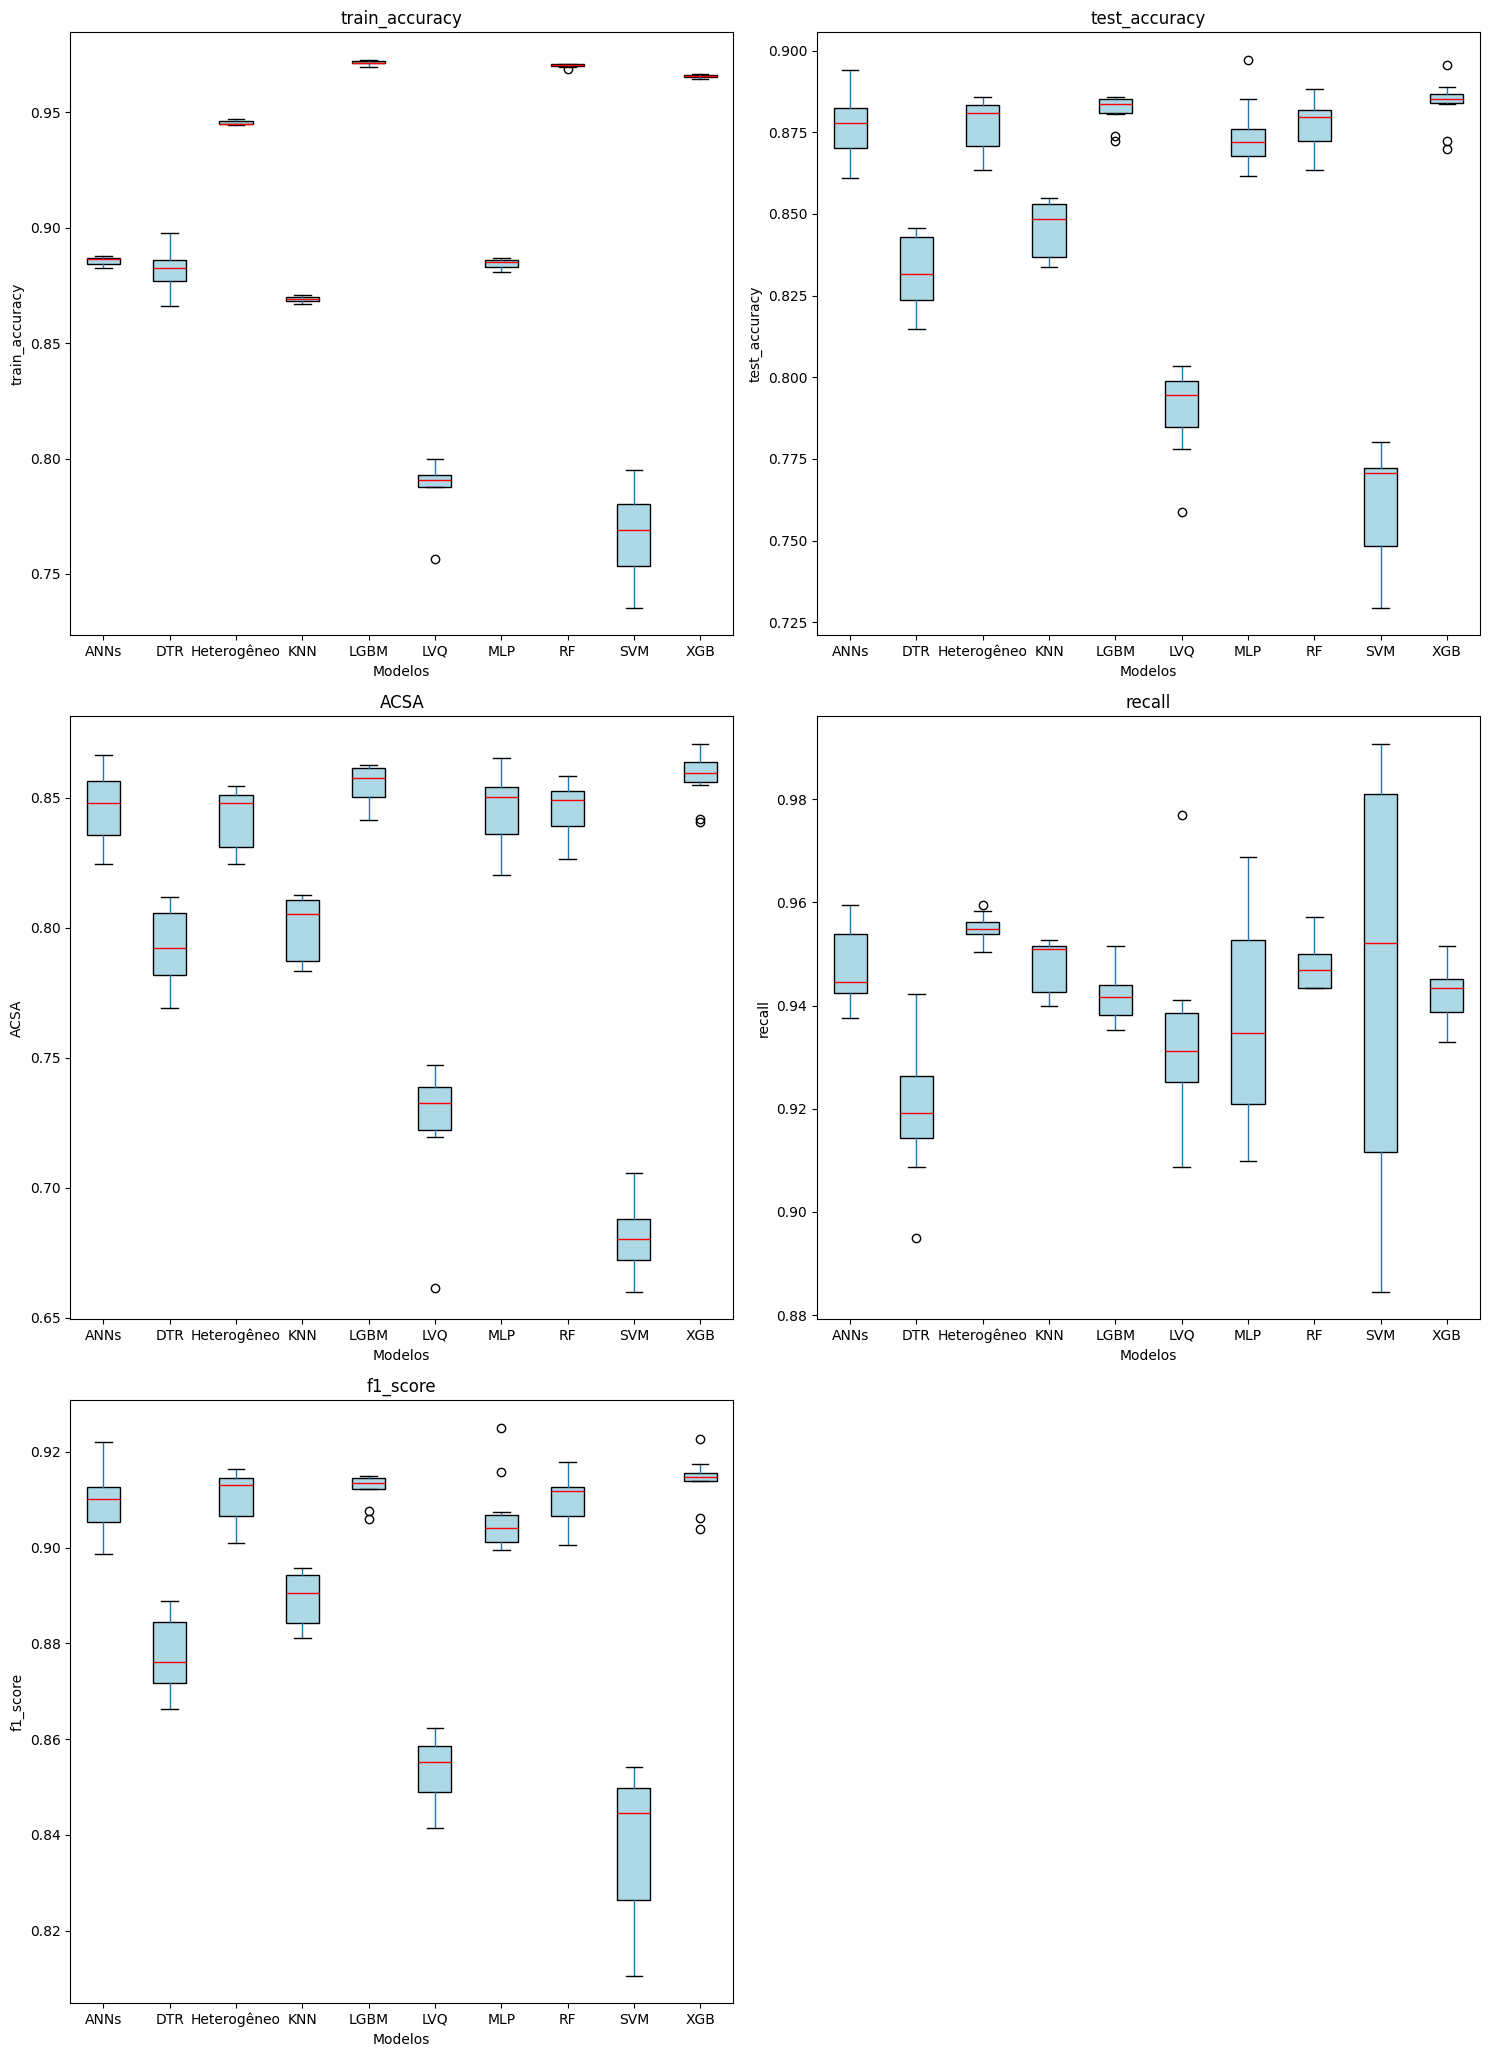

In [12]:
plot_metric_boxplots(
    list_of_model_results=list_of_model_results,
    list_of_model_names=list_of_model_names,
    list_of_metrics_names=['train_accuracy', 'test_accuracy', 'ACSA', 'recall', 'f1_score']
)

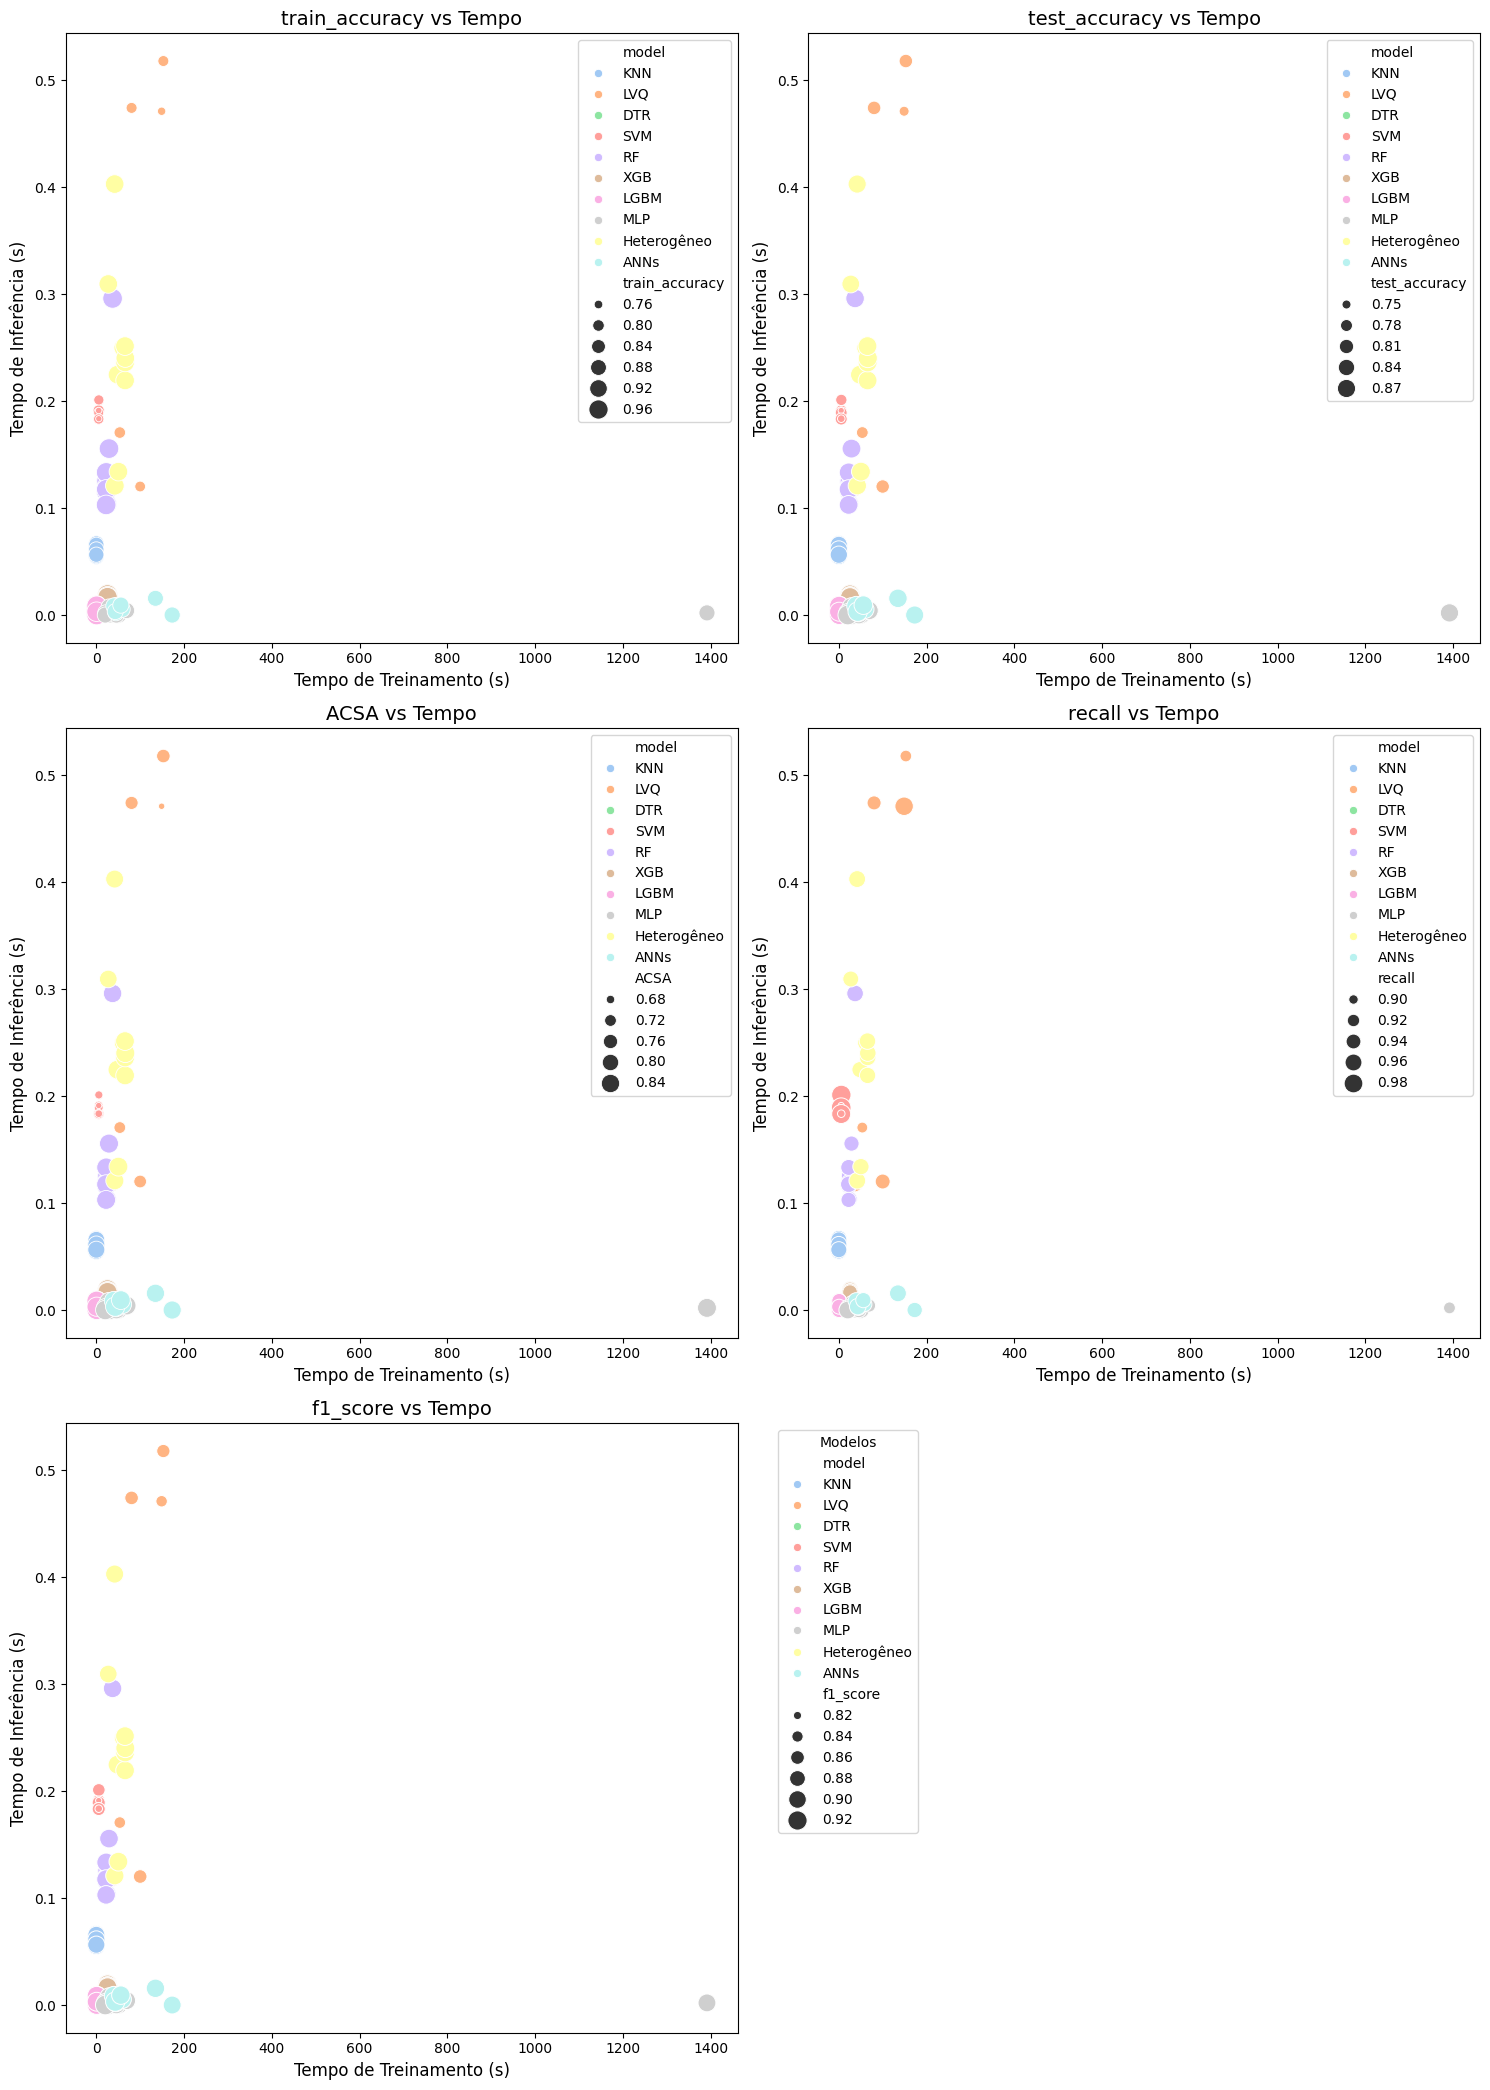

In [13]:
plot_time_vs_performance_scatter(
    list_of_model_results=list_of_model_results,
    list_of_model_names=list_of_model_names,
    list_of_metrics_names=['train_accuracy', 'test_accuracy', 'ACSA', 'recall', 'f1_score']
)


# Com ADASYN

In [14]:
best_models, ensembles = models_to_cv()

metrics = {}
for model in best_models.keys():
    metrics[model] = pd.read_csv(f'../metrics/metrics_adasyn_{model}_cv.csv')
for model in ensembles.keys():
    metrics[model] = pd.read_csv(f'../metrics/metrics_adasyn_{model}_cv.csv')

In [15]:
list_of_model_results = [metrics[model] for model in metrics.keys()]
list_of_model_names = list(metrics.keys())
list_of_metrics_names = ['train_accuracy', 'test_accuracy', 'ACSA', 'recall', 'f1_score', 'training_time', 'inference_time']

comp = StatisticalMethods(list_of_model_results, list_of_model_names, list_of_metrics_names)

friedman_results, metrics_with_difference = comp.friedman_test()

nemenyi_results = comp.nemenyi_test(metrics_with_difference)

In [16]:
comp.get_estimate_and_ci()

,model,metric,mean,std,ci
0,KNN,train_accuracy,0.877830,0.001451,"0.8769, 0.8787"
1,KNN,test_accuracy,0.803750,0.008439,"0.7985, 0.8090"
2,KNN,ACSA,0.803683,0.010892,"0.7969, 0.8104"
3,KNN,recall,0.803903,0.007078,"0.7995, 0.8083"
4,KNN,f1_score,0.842799,0.006399,"0.8388, 0.8468"
...,...,...,...,...,...
65,ANNs,ACSA,0.849956,0.010191,"0.8436, 0.8563"
66,ANNs,recall,0.866494,0.020154,"0.8540, 0.8790"
67,ANNs,f1_score,0.886573,0.009849,"0.8805, 0.8927"
68,ANNs,training_time,130.527292,52.190826,"98.1791, 162.8755"


In [17]:
estimates_and_cis = comp.get_formatted_estimate_and_ci()
estimates_and_cis

,Modelo,Métrica,Média,Desvio,IC
0,KNN,Acurácia de treino,87.78,0.15,"[87.69 , 87.87]"
1,KNN,Acurácia de teste,80.37,0.84,"[79.85 , 80.90]"
2,KNN,ACSA,80.37,1.09,"[79.69 , 81.04]"
3,KNN,Recall,80.39,0.71,"[79.95 , 80.83]"
4,KNN,F1-score,84.28,0.64,"[83.88 , 84.68]"
...,...,...,...,...,...
65,ANNs,ACSA,85.00,1.02,"[84.36 , 85.63]"
66,ANNs,Recall,86.65,2.02,"[85.40 , 87.90]"
67,ANNs,F1-score,88.66,0.98,"[88.05 , 89.27]"
68,ANNs,Tempo de treinamento,130.50,52.20,"[9817.91 , 16287.55]"


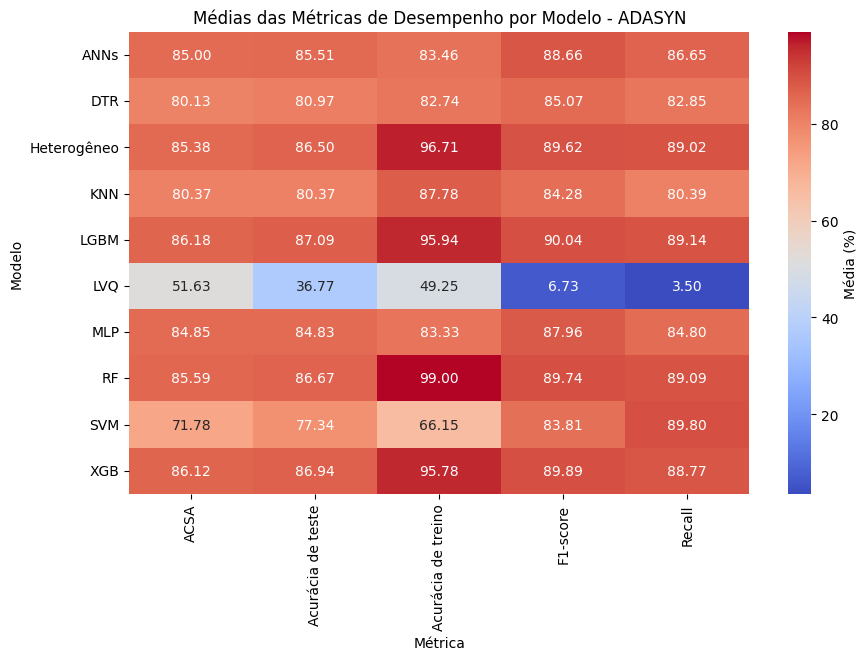

In [18]:
filtered_data = estimates_and_cis[estimates_and_cis['Métrica'].isin(['ACSA', 'Recall', 'F1-score', 'Acurácia de treino', 'Acurácia de teste'])]
heatmap_data = filtered_data.pivot(index="Modelo", columns="Métrica", values="Média")

plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, fmt=".2f", cmap="coolwarm", cbar_kws={'label': 'Média (%)'})
plt.title("Médias das Métricas de Desempenho por Modelo - ADASYN")
plt.xlabel("Métrica")
plt.ylabel("Modelo")
plt.show()

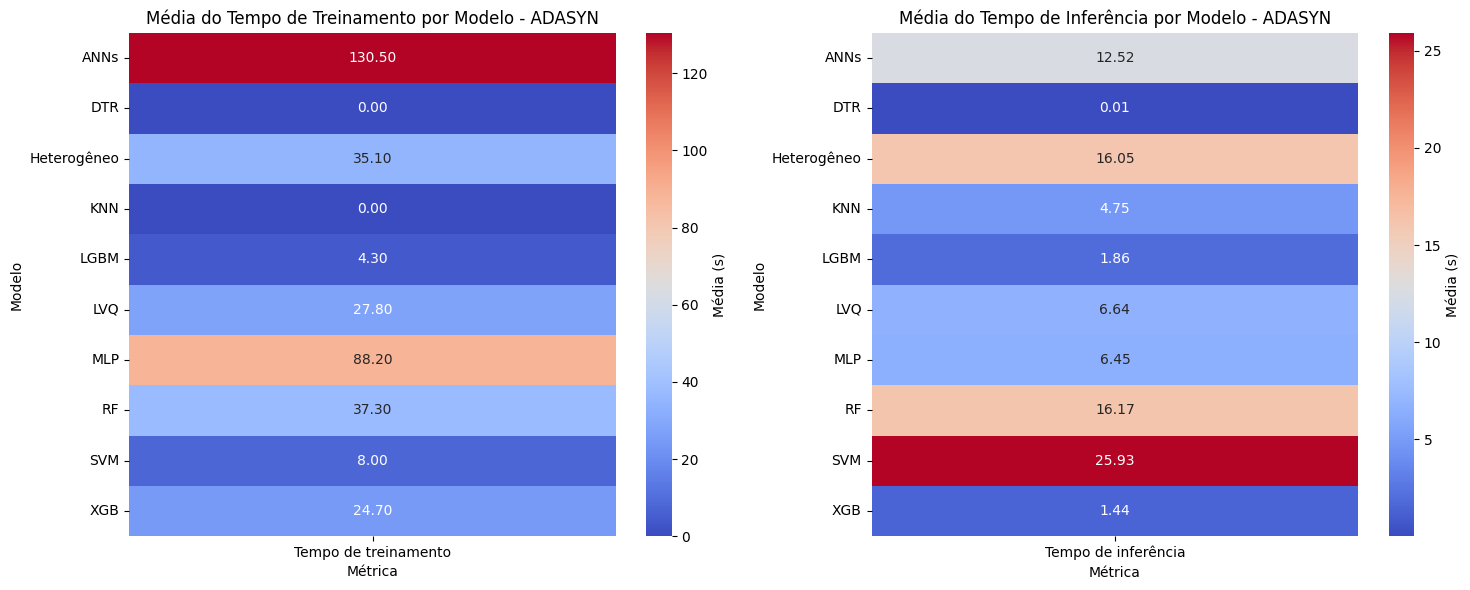

In [19]:
filtered_training_time = estimates_and_cis[estimates_and_cis['Métrica'] == 'Tempo de treinamento']
heatmap_training_time = filtered_training_time.pivot(index="Modelo", columns="Métrica", values="Média")

filtered_inference_time = estimates_and_cis[estimates_and_cis['Métrica'] == 'Tempo de inferência']
heatmap_inference_time = filtered_inference_time.pivot(index="Modelo", columns="Métrica", values="Média")

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

sns.heatmap(heatmap_training_time, annot=True, fmt=".2f", cmap="coolwarm", cbar_kws={'label': 'Média (s)'}, ax=axes[0])
axes[0].set_title("Média do Tempo de Treinamento por Modelo - ADASYN")
axes[0].set_xlabel("Métrica")
axes[0].set_ylabel("Modelo")

sns.heatmap(heatmap_inference_time, annot=True, fmt=".2f", cmap="coolwarm", cbar_kws={'label': 'Média (s)'}, ax=axes[1])
axes[1].set_title("Média do Tempo de Inferência por Modelo - ADASYN")
axes[1].set_xlabel("Métrica")
axes[1].set_ylabel("Modelo")

plt.tight_layout()
plt.show()

In [20]:
friedman_results

,metric,statistic,p-value,are_different
0,train_accuracy,87.883636,4.324189e-15,True
1,test_accuracy,78.905832,2.664925e-13,True
2,ACSA,76.167273,9.291787e-13,True
3,recall,68.842587,2.566601e-11,True
4,f1_score,78.196364,3.684490e-13,True
5,training_time,84.501818,2.051354e-14,True
6,inference_time,73.112727,3.723080e-12,True


In [21]:
nemenyi_results

,metric,classifier_pair,p-value,are_different
0,train_accuracy,KNN vs LVQ,0.008432,True
1,train_accuracy,KNN vs DTR,0.705351,False
2,train_accuracy,KNN vs SVM,0.091175,False
3,train_accuracy,KNN vs RF,0.091175,False
4,train_accuracy,KNN vs XGB,0.996898,False
...,...,...,...,...
310,inference_time,LGBM vs Heterogêneo,0.008432,True
311,inference_time,LGBM vs ANNs,0.796635,False
312,inference_time,MLP vs Heterogêneo,0.303497,False
313,inference_time,MLP vs ANNs,0.999990,False


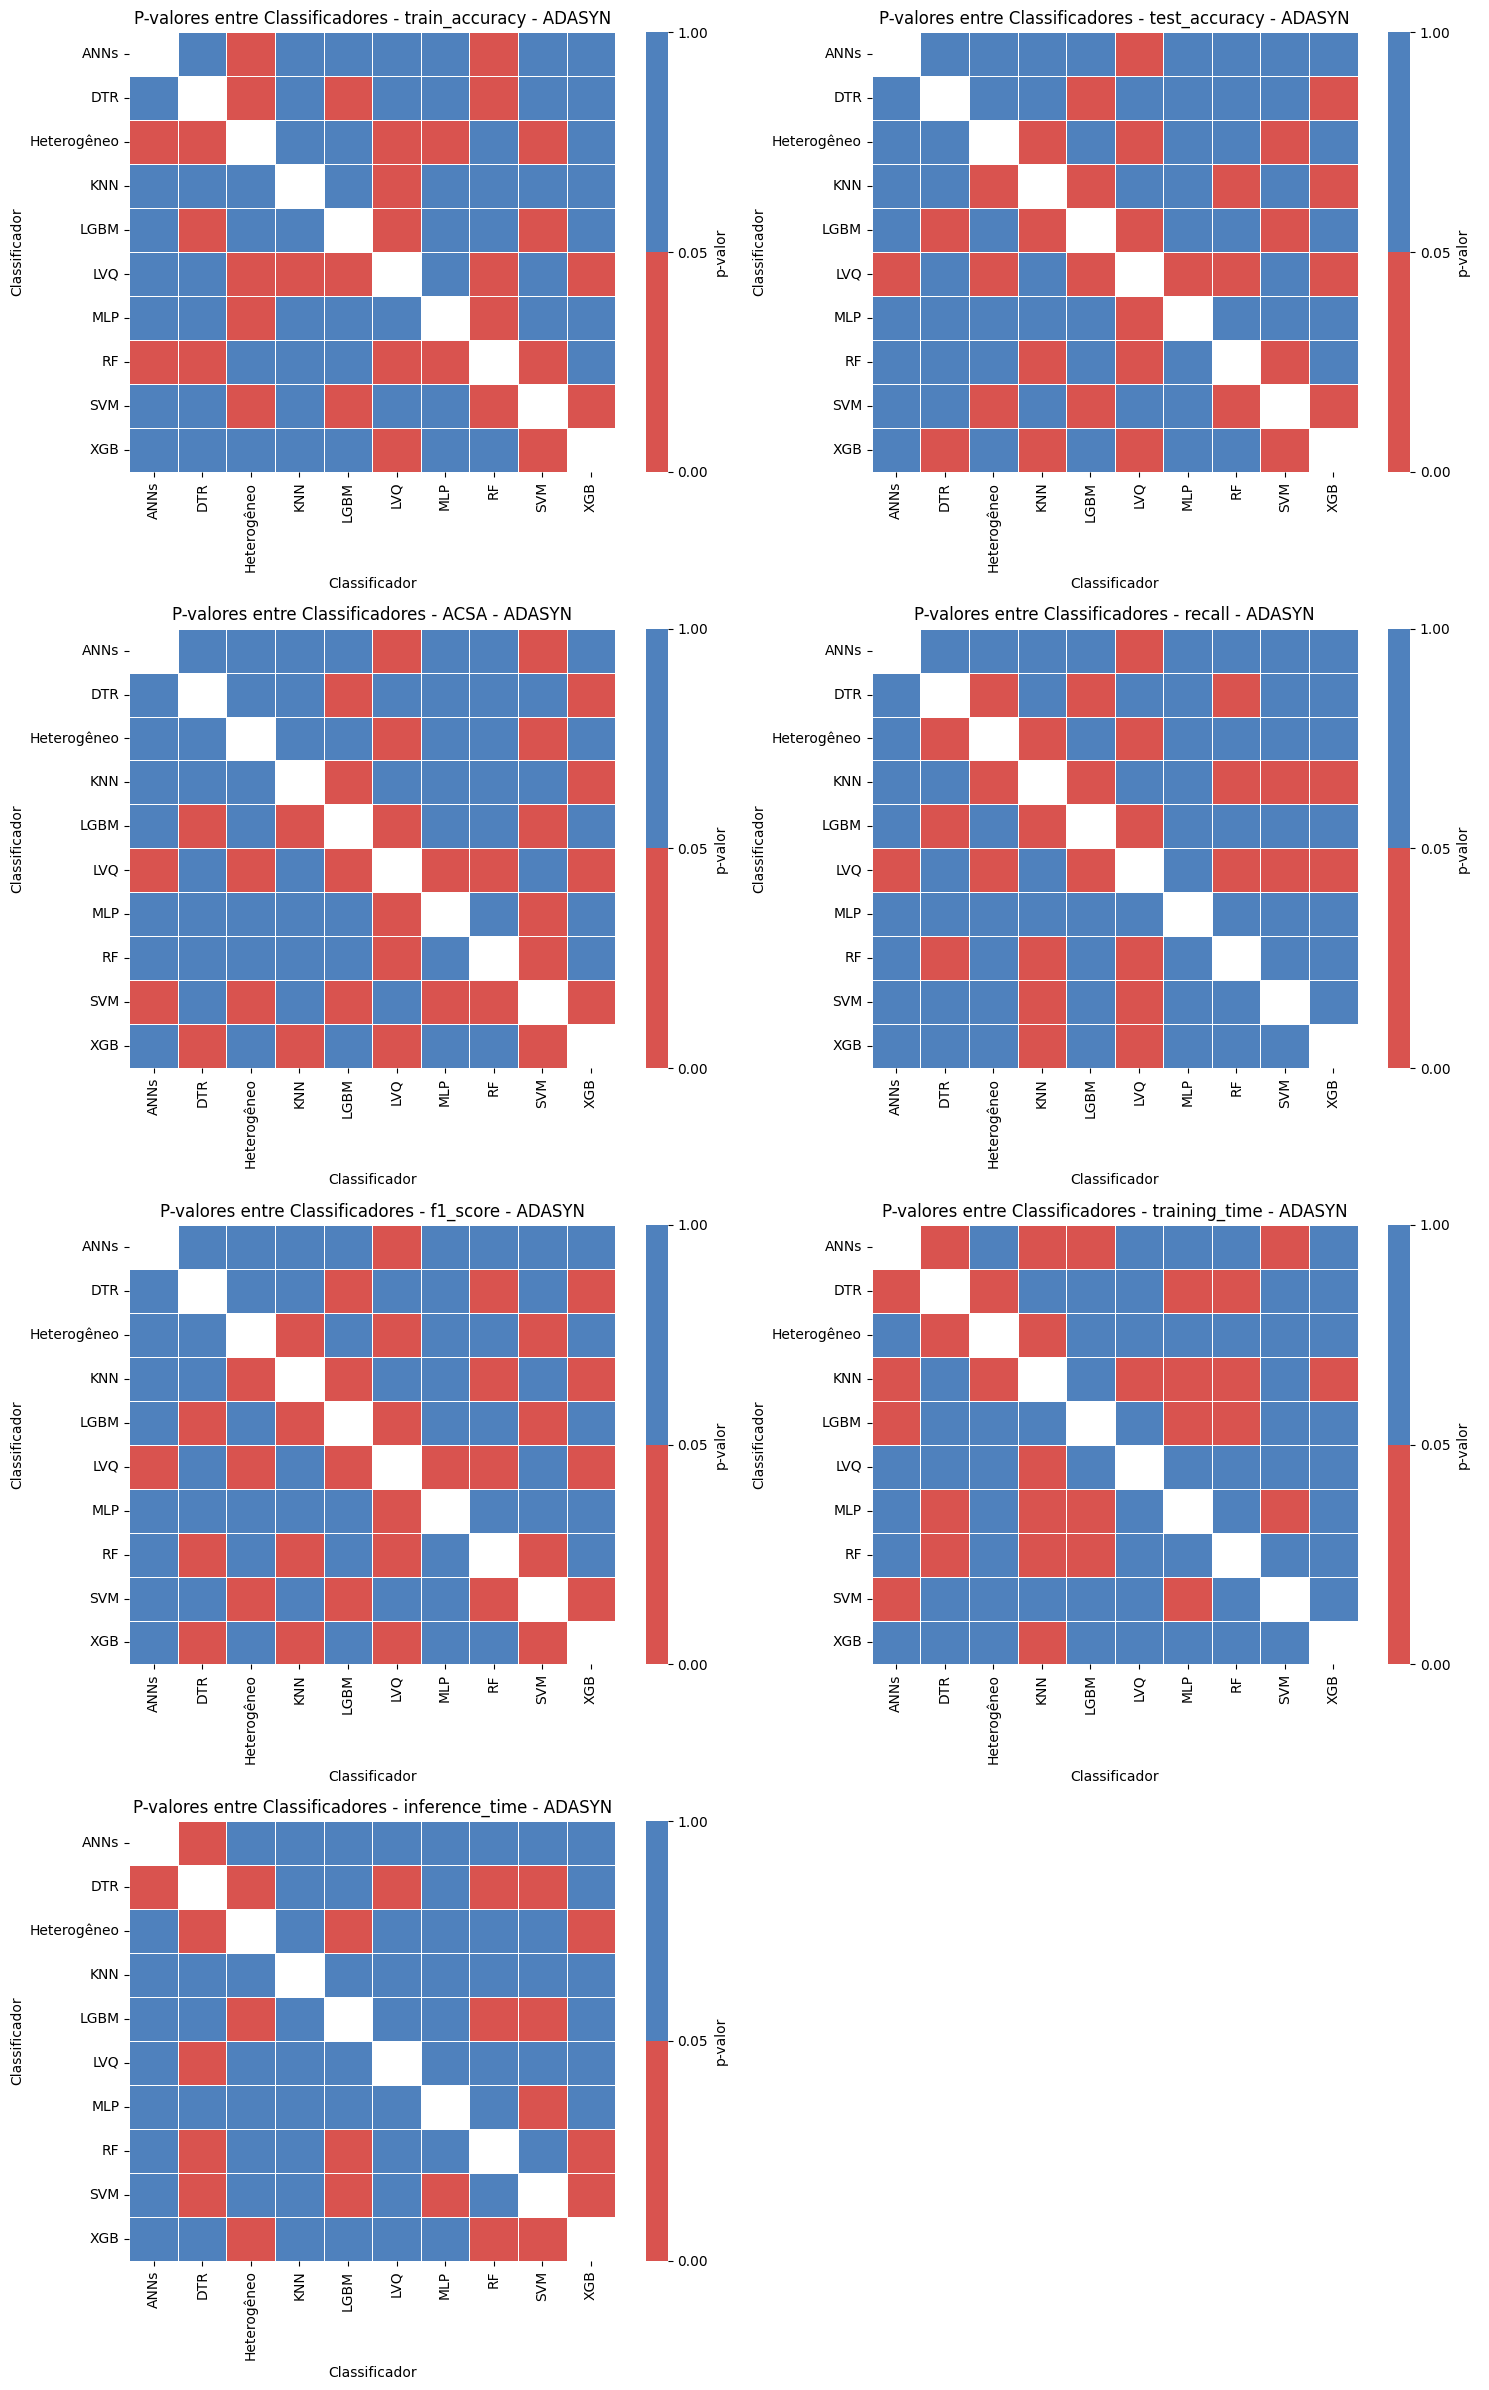

In [22]:

nemenyi_results[['classifier1', 'classifier2']] = nemenyi_results['classifier_pair'].str.split(' vs ', expand=True)

num_metrics = len(nemenyi_results['metric'].unique())
num_columns = 2
num_rows = math.ceil(num_metrics / num_columns)

fig, axes = plt.subplots(num_rows, num_columns, figsize=(15, 6 * num_rows))
axes = axes.flatten()

for i, metric in enumerate(nemenyi_results['metric'].unique()):
    metric_data = nemenyi_results[nemenyi_results['metric'] == metric]
    pivot_table = metric_data.pivot_table(index="classifier1", columns="classifier2", values="p-value").combine_first(metric_data.pivot_table(index="classifier2", columns="classifier1", values="p-value"))
    sns.heatmap(pivot_table, annot=False, fmt=".4f", cmap=mcolors.ListedColormap(["#D9534F", "#4F81BD"]), norm=mcolors.BoundaryNorm([0, 0.05, 1], 2), linewidths=0.5, cbar_kws={'label': 'p-valor'}, annot_kws={'color': 'white', 'fontsize': 10}, ax=axes[i])
    axes[i].set_title(f"P-valores entre Classificadores - {metric} - ADASYN")
    axes[i].set_xlabel("Classificador")
    axes[i].set_ylabel("Classificador")

for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()


In [23]:
nemenyi_results.loc[nemenyi_results['are_different'] == True]

,metric,classifier_pair,p-value,are_different,classifier1,classifier2
0,train_accuracy,KNN vs LVQ,8.431749e-03,True,KNN,LVQ
11,train_accuracy,LVQ vs RF,1.345634e-09,True,LVQ,RF
12,train_accuracy,LVQ vs XGB,2.011091e-04,True,LVQ,XGB
13,train_accuracy,LVQ vs LGBM,2.252287e-05,True,LVQ,LGBM
15,train_accuracy,LVQ vs Heterogêneo,1.548799e-07,True,LVQ,Heterogêneo
...,...,...,...,...,...,...
297,inference_time,SVM vs MLP,3.839448e-02,True,SVM,MLP
300,inference_time,RF vs XGB,3.983995e-04,True,RF,XGB
301,inference_time,RF vs LGBM,2.681559e-03,True,RF,LGBM
307,inference_time,XGB vs Heterogêneo,1.455492e-03,True,XGB,Heterogêneo


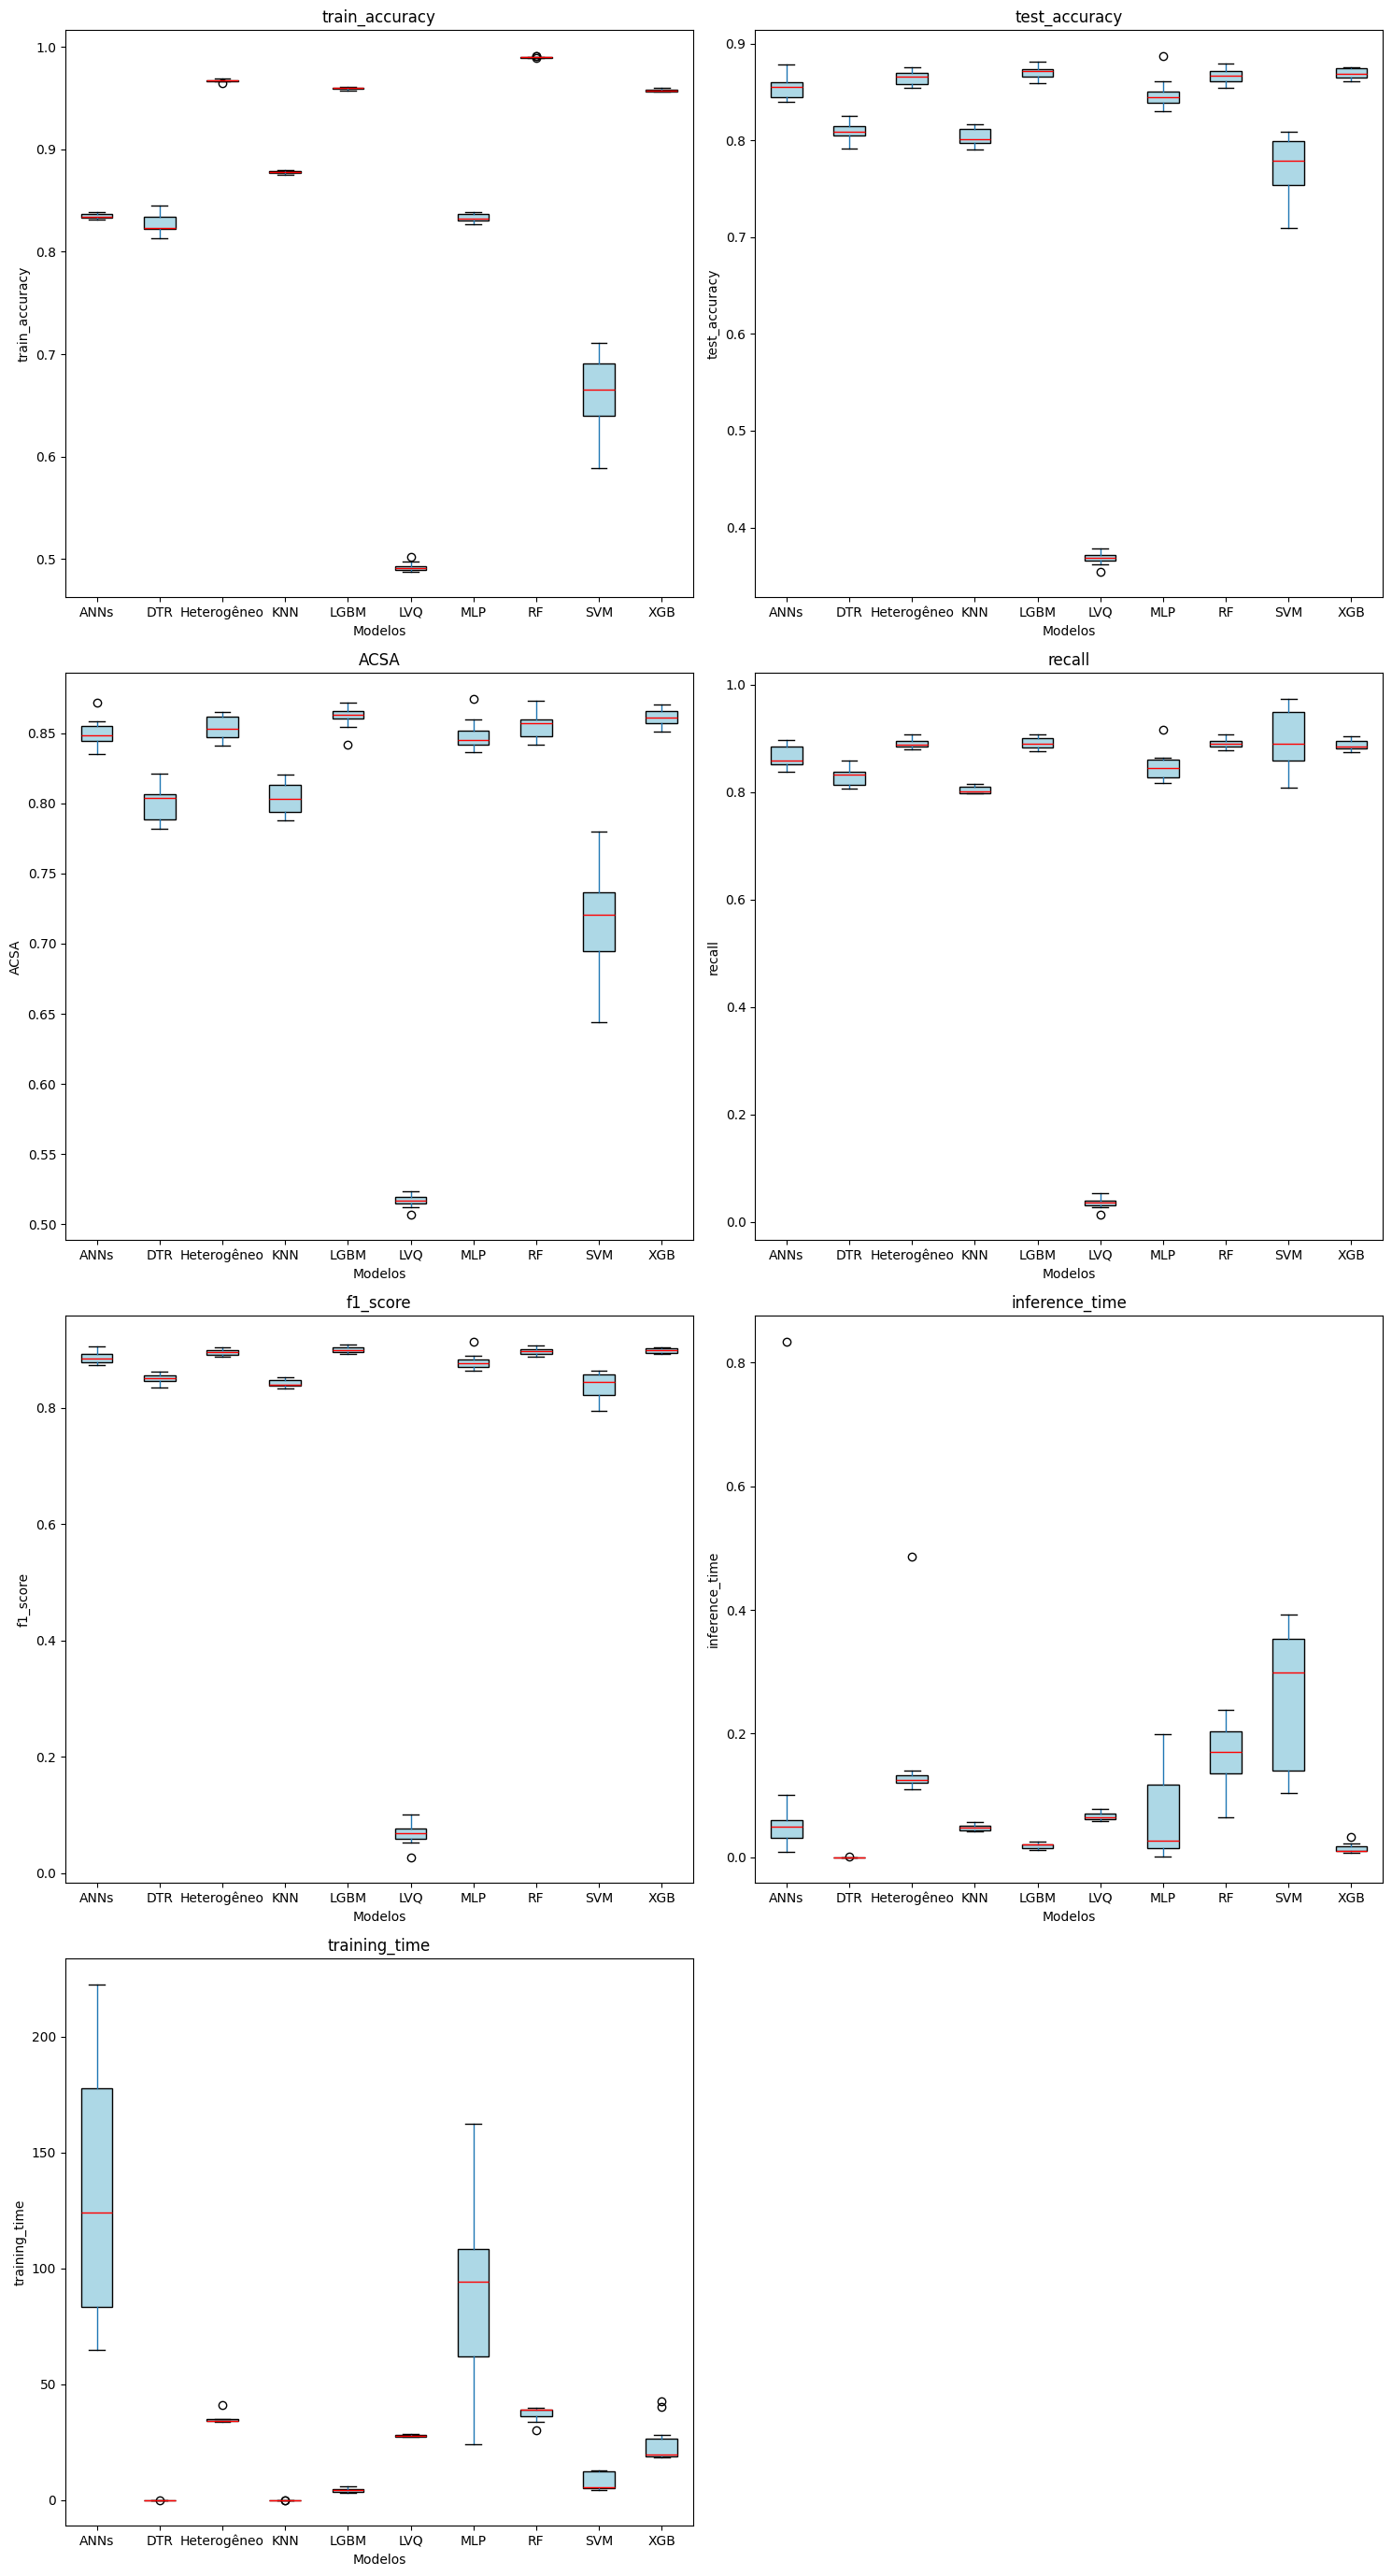

In [24]:
plot_metric_boxplots(
    list_of_model_results=list_of_model_results,
    list_of_model_names=list_of_model_names,
    list_of_metrics_names=['train_accuracy', 'test_accuracy', 'ACSA', 'recall', 'f1_score', 'inference_time', 'training_time']
)

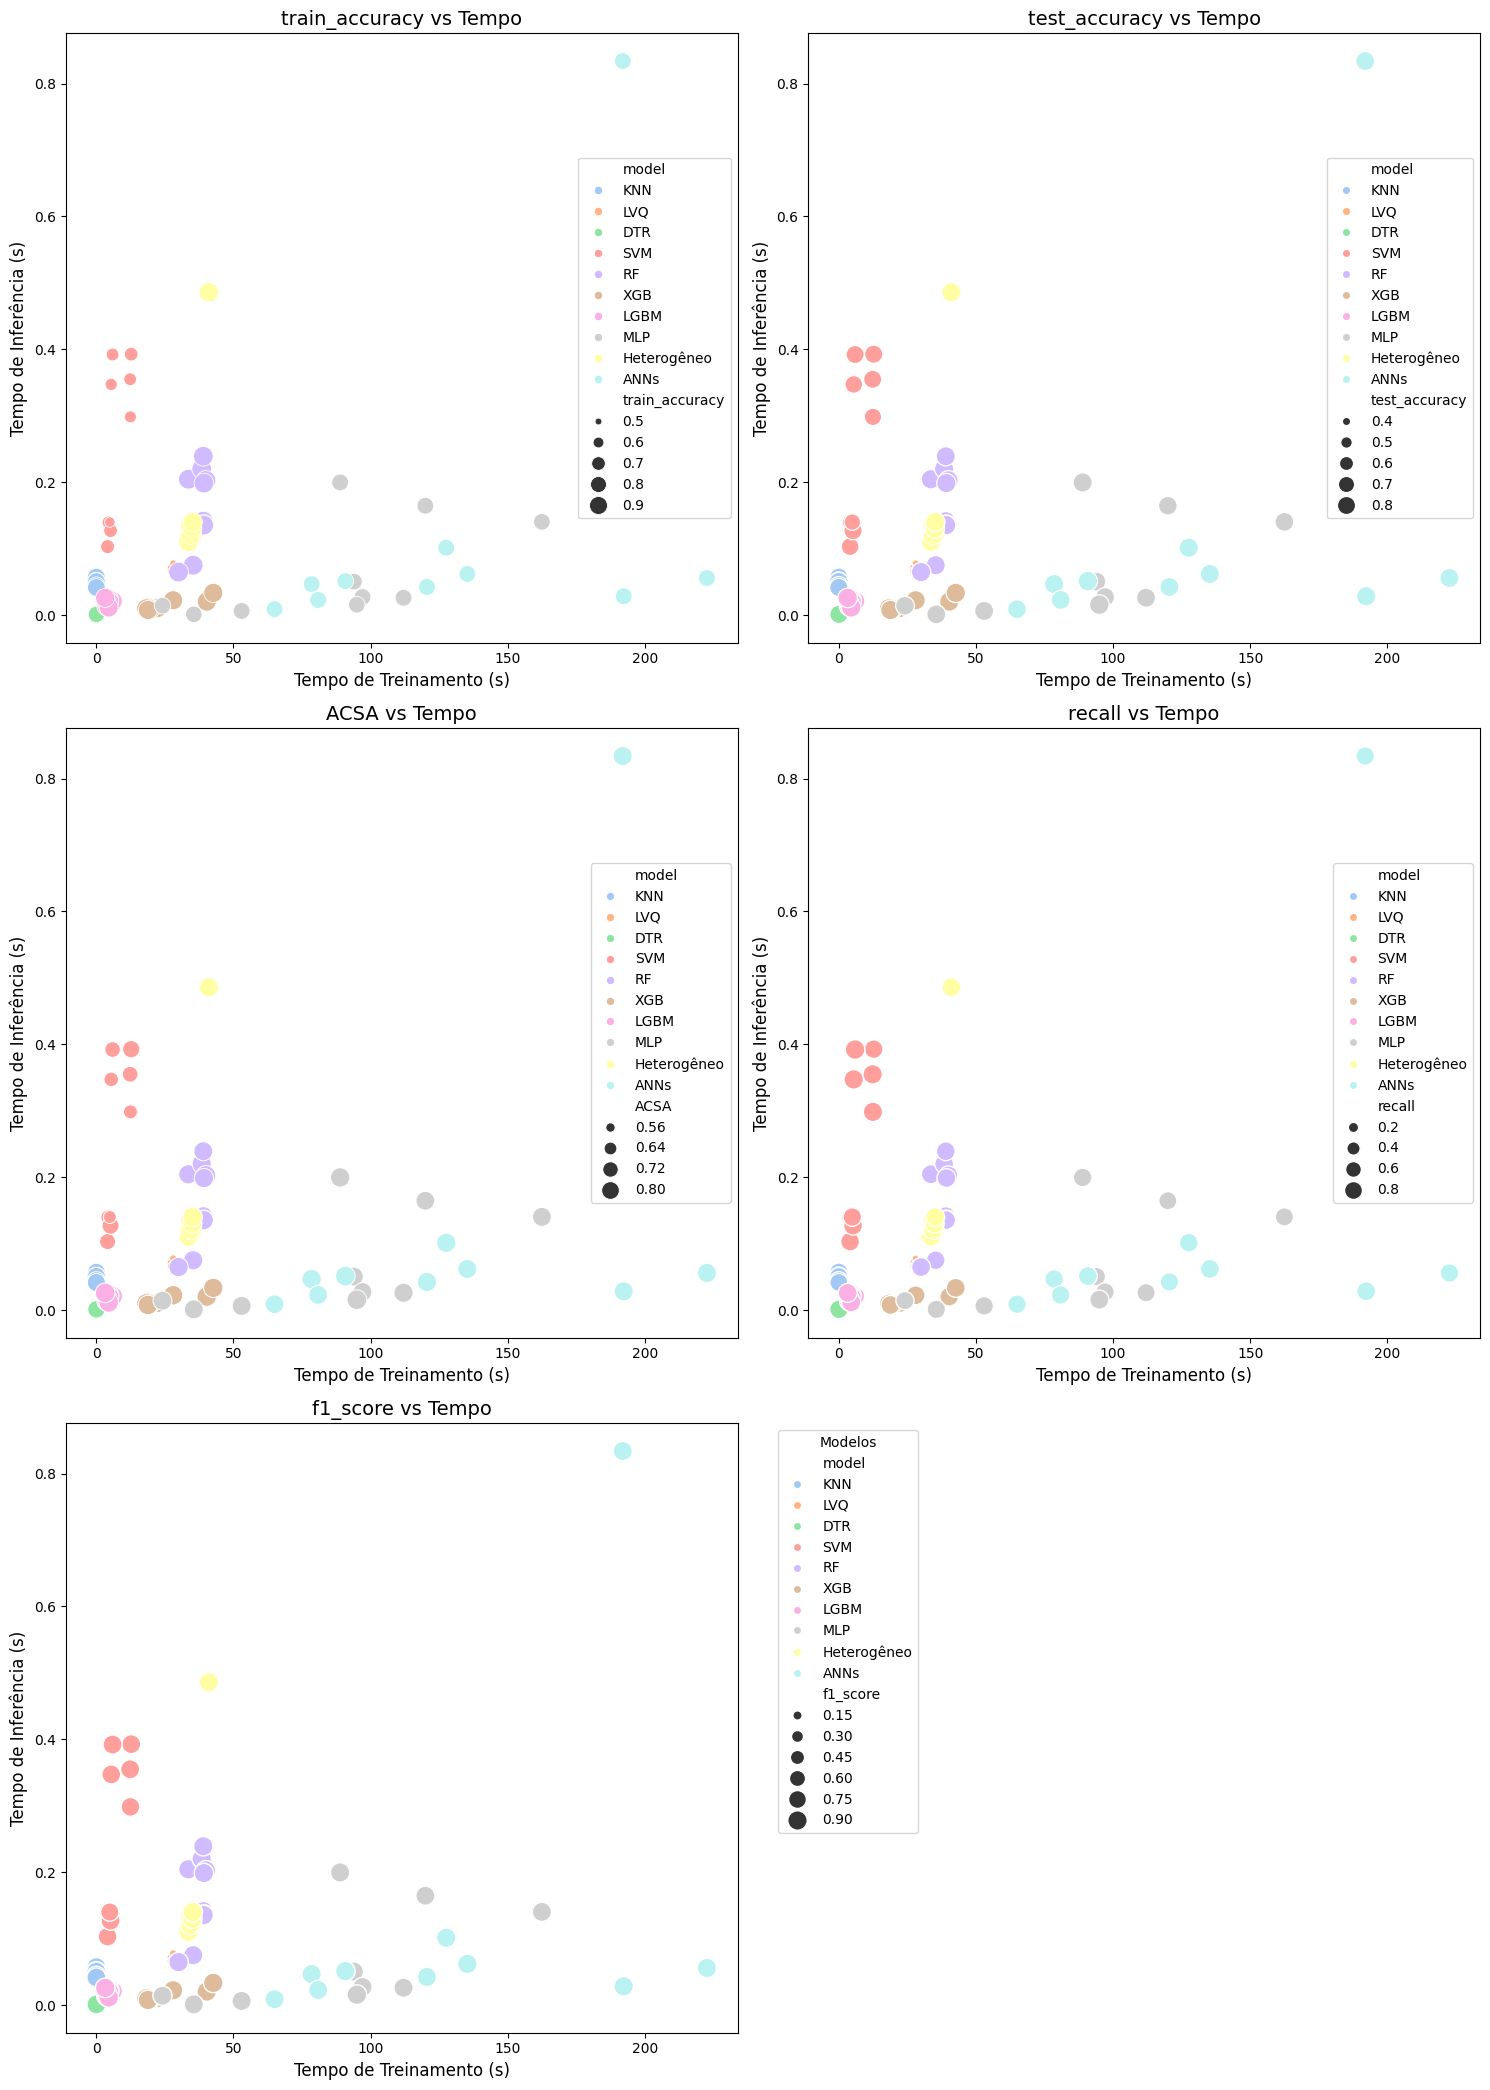

In [25]:
plot_time_vs_performance_scatter(
    list_of_model_results=list_of_model_results,
    list_of_model_names=list_of_model_names,
    list_of_metrics_names=['train_accuracy', 'test_accuracy', 'ACSA', 'recall', 'f1_score']
)